# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [4]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [5]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import keras
import sklearn
import zipfile
import os
import warnings 

warnings.filterwarnings('ignore')

# Set themes, styles and color palette for seaborn charts
sns.set_theme(style='darkgrid', context='poster')
sns.set_palette(palette='pastel', n_colors=10)

plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["axes.titlesize"] = 14 
plt.rcParams["axes.labelsize"] = 12 
plt.rcParams["xtick.labelsize"] = 10 
plt.rcParams["ytick.labelsize"] = 10 

# Print version numbers
print('Numpy version:      ' + np.__version__)
print('Pandas version:     ' + pd.__version__)
print('Seaborn version:    ' + sns.__version__)
print('Matplotlib version: ' + matplotlib.__version__)
print('PIL version:        ' + Image.__version__)
print('TensorFlow version: ' + tf.__version__)
print('Keras version:      ' + keras.__version__)
print('Scikit-learn version: ' + sklearn.__version__)

Numpy version:      1.26.4
Pandas version:     2.2.2
Seaborn version:    0.13.2
Matplotlib version: 3.9.2
PIL version:        10.4.0
TensorFlow version: 2.18.1
Keras version:      3.9.2
Scikit-learn version: 1.5.1


Load the dataset.

In [6]:
# Load and unzip the dataset

# The data.zip is loaded from https://drive.google.com/drive/folders/1sajIcvGxBemqK_YIHFoY28EyV1Su_b5M?usp=drive_link
zip_path = 'data.zip' 
extract_folder = 'waste_dataset' 

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Dataset extracted to '{extract_folder}'")

Dataset extracted to 'waste_dataset'


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [43]:
# Create a function to load the raw images
target_size = (128, 128)
def load_images(folder_name, target_size=target_size):
    images = []
    labels = []
    
    sub_folder_names = os.listdir(folder_name)
    
    # Tried removing 'Other' subfolder as the model was predicting every image in other category!
    # sub_folder_names = [name for name in os.listdir(folder_name) if name != 'Other']

    for sub_folder_name in sub_folder_names:
        sub_folder_path = os.path.join(folder_name, sub_folder_name)

        file_names = os.listdir(sub_folder_path)

        for file_name in filter(lambda k: '.png' in k, file_names):
            file_path = os.path.join(sub_folder_path, file_name)

            try:
                file = Image.open(file_path).convert(mode='RGB')
                file = file.resize(target_size)

                normalized_image_array = np.array(file, dtype=np.float32) / 255.0
                
                images.append(normalized_image_array)
                labels.append(sub_folder_name)
            except Exception as ex:
                print(f"Error loading image {file_path}: {ex}")
    
    return np.array(images), np.array(labels)


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [44]:
# Get the images and their labels
extract_folder_data = os.path.join(extract_folder, 'data')

X, y = load_images(extract_folder_data)

In [45]:
print(f"Number of images loaded: {len(X)}")
print(f"Number of labels: {len(y)}")
print(f"Unique labels: {np.unique(y)}")

# Quick Observation
# ------------------------
# 1. There are 7625 images loaded and 7 unique labels
# ------------------------

Number of images loaded: 7625
Number of labels: 7625
Unique labels: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

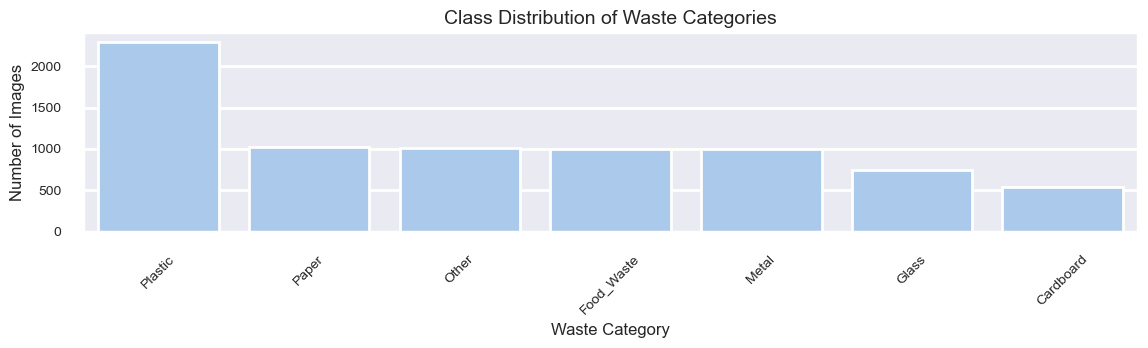

In [46]:
# Visualise Data Distribution
label_counts = pd.Series(y).value_counts()

sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Class Distribution of Waste Categories')
plt.xlabel('Waste Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

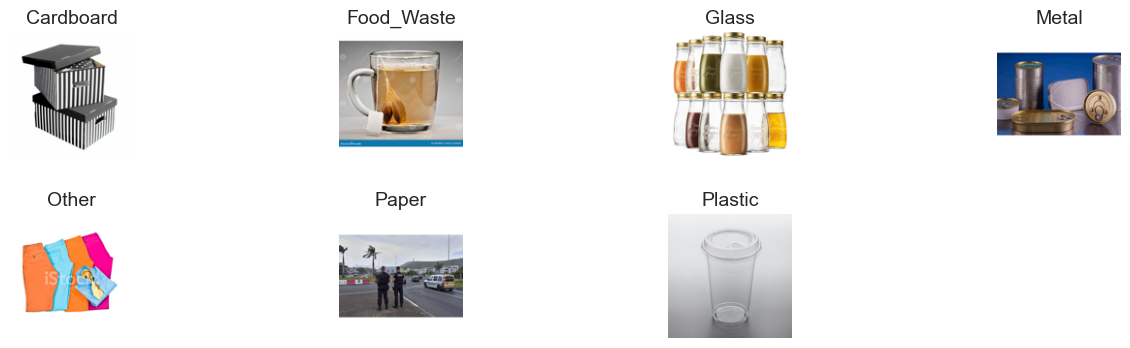

In [47]:
# Visualise Sample Images (across different labels)
import random

combined_data = list(zip(X, y))
unique_labels = np.unique(y)
sample_images = [random.choice([img for img, label in combined_data if label == l]) for l in unique_labels]

plt.figure(figsize=(14, 4))

for i, img in enumerate(sample_images):
    plt.subplot(2, (len(sample_images) + 1) // 2, i + 1)
    plt.imshow(img)
    plt.title(unique_labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [48]:
# Find the smallest and largest image dimensions from the data set

# 1. I have already resized and normalized the images. Hence showing the image size of hte sample imageset.

for label, img in zip(unique_labels, sample_images):
    h, w = img.shape[:2]
    print(f"Label: {label}, Height: {h}, Width: {w}")

# Quick Observation
# ------------------------
# 1. The height and width of the images are 64.
#    As you can notice hte signature of function load_images(folder_name, target_size=(64, 64)).
#    The attribute target_size is defaulted to 64, 64
#    Hence the images are resized before being loaded into the collection.
# ------------------------

Label: Cardboard, Height: 128, Width: 128
Label: Food_Waste, Height: 128, Width: 128
Label: Glass, Height: 128, Width: 128
Label: Metal, Height: 128, Width: 128
Label: Other, Height: 128, Width: 128
Label: Paper, Height: 128, Width: 128
Label: Plastic, Height: 128, Width: 128


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [49]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_labels = label_encoder.fit_transform(y)

for id, label in enumerate(label_encoder.classes_):
    print(f"{id}: {label}")

print("Encoded collection:", encoded_labels)
print("Actual collection:", y)

0: Cardboard
1: Food_Waste
2: Glass
3: Metal
4: Other
5: Paper
6: Plastic
Encoded collection: [0 0 0 ... 6 6 6]
Actual collection: ['Cardboard' 'Cardboard' 'Cardboard' ... 'Plastic' 'Plastic' 'Plastic']


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [50]:
# Assign specified parts of the dataset to train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, encoded_labels, test_size=0.3, stratify=encoded_labels, random_state=100)

print(f"Image collection training set: {X_train.shape}")
print(f"Image collection validation set: {X_val.shape}")

print(f"Image labels training set: {y_train.shape}")
print(f"Image labels validation set: {y_val.shape}")

Image collection training set: (5337, 128, 128, 3)
Image collection validation set: (2288, 128, 128, 3)
Image labels training set: (5337,)
Image labels validation set: (2288,)


In [51]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_val, counts_val = np.unique(y_val, return_counts=True)

print("Training set class distribution:", dict(zip(unique_train, counts_train)))
print("Validation set class distribution:", dict(zip(unique_val, counts_val)))

Training set class distribution: {0: 378, 1: 700, 2: 525, 3: 700, 4: 707, 5: 721, 6: 1606}
Validation set class distribution: {0: 162, 1: 300, 2: 225, 3: 300, 4: 303, 5: 309, 6: 689}


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [52]:
# Build and compile the model

# We'll use sequential type of model. In this neural layers are added in a linear stack, one after the other
# In our case we'll have an input layer, 3 convolutional layers and an output layer
from tensorflow.keras.models import Sequential

# Conv2D is used for applying filters and detecting patterns
# MaxPooling2D is used to impliment the pooling concept ie., get a 2 x 2 region and get the max value
# Flatten is used to convert 2D feature maps to single dimension array, which can be fed into dense layers. 6 x 6 pixel image to an array of len 36
# Dense takes the flatten input from each neuron, applies and activation function and outputs probabilities for each class.
# Dropout drops a fraction of the neurons during training, helps prevent overfitting.
# BatchNormalization helps in speeding up learning
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input)

from tensorflow.keras.regularizers import l2

In [53]:
input_shape = sample_images[0].shape
num_classes = len(unique_labels)

# Reference: https://keras.io/api/models/sequential/
# Sequential will group a linear stack of layers into a model. We can add multiple layers to the stack, one at a time.
model = Sequential()

model.add(Input(shape=input_shape))

In [54]:
# Convolutional layer 1 added to the model
# ----------------------------------------
# Reference: https://keras.io/api/layers/convolution_layers/convolution2d/
# 32 filters in the convolution
# The convolutional window is 3,3
# We'll use relu activation function
# We'll use default stride 1, 1 ie., the filter will move one step at a time. Padding 'same' will add padding on all sides to retain the shape
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))

# Reference: https://keras.io/api/layers/normalization_layers/batch_normalization/
# Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
model.add(BatchNormalization())

# Reference: https://keras.io/api/layers/pooling_layers/max_pooling2d/
# By doing pooling, the system will go through 2 x 2 matrix and get the max value.
model.add(MaxPooling2D(pool_size=(2, 2)))

# Reference: https://keras.io/api/layers/regularization_layers/dropout/
# Dropout is a regularization technique. In the following code we're turning off 25% of the neurons
model.add(Dropout(0.25))
# ----------------------------------------

In [55]:
# Convolutional layer 2 added to the model
# ----------------------------------------
# The number of filters is increased to 64 for deeper learning than the basic understanding of the image
# Also we're dropping 25% more neurons
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
# ----------------------------------------

In [56]:
# Convolutional layer 3 added to the model
# ----------------------------------------
# The number of filters is increased to 128 for deeper learning than the basic understanding of the image
# Also we're dropping 25% more neurons
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
# ----------------------------------------

In [57]:
# Fully connected layers
model.add(Flatten())  
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

In [58]:
# Reference: https://keras.io/api/models/model_training_apis/
# Compile the model
# Because labels are integer encoded, we use the loss function sparse_categorical_crossentropy https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class
model.compile(
    # optimizer='adam',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [59]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,122,727 (8.10 MB)

 Trainable params: 2,122,247 (8.10 MB)

 Non-trainable params: 480 (1.88 KB)

In [60]:
# Print shape details
print("Layer-by-layer output shapes:\n")
for i, layer in enumerate(model.layers):
    print(layer)
    print(layer.output.shape)

Layer-by-layer output shapes:

<Conv2D name=conv2d_3, built=True>
(None, 128, 128, 16)
<BatchNormalization name=batch_normalization_4, built=True>
(None, 128, 128, 16)
<MaxPooling2D name=max_pooling2d_3, built=True>
(None, 64, 64, 16)
<Dropout name=dropout_4, built=True>
(None, 64, 64, 16)
<Conv2D name=conv2d_4, built=True>
(None, 64, 64, 32)
<BatchNormalization name=batch_normalization_5, built=True>
(None, 64, 64, 32)
<MaxPooling2D name=max_pooling2d_4, built=True>
(None, 32, 32, 32)
<Dropout name=dropout_5, built=True>
(None, 32, 32, 32)
<Conv2D name=conv2d_5, built=True>
(None, 32, 32, 64)
<BatchNormalization name=batch_normalization_6, built=True>
(None, 32, 32, 64)
<MaxPooling2D name=max_pooling2d_5, built=True>
(None, 16, 16, 64)
<Dropout name=dropout_6, built=True>
(None, 16, 16, 64)
<Flatten name=flatten_1, built=True>
(None, 16384)
<Dense name=dense_2, built=True>
(None, 128)
<BatchNormalization name=batch_normalization_7, built=True>
(None, 128)
<Dropout name=dropout_7, buil

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [61]:
# Training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight

# Callback functions used - EarlyStopping and ModelCheckpoint
# Reference: https://keras.io/api/callbacks/early_stopping/
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Reference: https://keras.io/api/callbacks/model_checkpoint/
checkpoint_filepath = '/tmp/ckpt/checkpoint.weights.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

# Introducing a new callback funciton after the first observation - ReduceLROnPlateau
# Reference: https://keras.io/api/callbacks/reduce_lr_on_plateau/
reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Introduced class weights, as the model didn't learn well without weightage on each class
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

history = model.fit(
    X_train, 
    y_train, 
    batch_size=32, 
    epochs=50, 
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict,
    callbacks=[early_stopping_callback, model_checkpoint_callback, reduce_lr_callback])

# Quick Observations - Iteration 1:
#----------------------------------
# Training Accuracy is imploving by a small margin
# Loss is gradually decreasing
# Validation loss is huge! The training set it overfitting
#
# Epoch 1/10━━━━━━━━━━━━━━━━━━━━ - accuracy: 0.1639 - loss: 2.7129 - val_accuracy: 0.0000e+00 - val_loss: 22.4157
# Epoch 2/10━━━━━━━━━━━━━━━━━━━━ - accuracy: 0.2416 - loss: 2.0073 - val_accuracy: 6.2422e-04 - val_loss: 30.6398
# Epoch 3/10━━━━━━━━━━━━━━━━━━━━ - accuracy: 0.2680 - loss: 1.9028 - val_accuracy: 6.2422e-04 - val_loss: 35.1025
# Epoch 4/10━━━━━━━━━━━━━━━━━━━━ - accuracy: 0.2704 - loss: 1.7594 - val_accuracy: 0.0062 - val_loss: 59.8457
#----------------------------------

# Quick Observations - Iteration 2:
#----------------------------------
# Overfitting has reduced
# Learning rate reduction helped in reducing the validation loss
# ReduceLROnPlateau kicked in after 
#----------------------------------

Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.1479 - loss: 3.3798
Epoch 1: val_accuracy improved from -inf to 0.09790, saving model to /tmp/ckpt/checkpoint.weights.h5
167/167 ━━━━━━━━━━━━━━━━━━━━ 41s 232ms/step - accuracy: 0.1480 - loss: 3.3793 - val_accuracy: 0.0979 - val_loss: 2.9500 - learning_rate: 1.0000e-05
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.1936 - loss: 3.0568
Epoch 2: val_accuracy improved from 0.09790 to 0.10446, saving model to /tmp/ckpt/checkpoint.weights.h5
167/167 ━━━━━━━━━━━━━━━━━━━━ 37s 223ms/step - accuracy: 0.1937 - loss: 3.0567 - val_accuracy: 0.1045 - val_loss: 2.9372 - learning_rate: 1.0000e-05
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.1974 - loss: 3.0220
Epoch 3: val_accuracy improved from 0.10446 to 0.14161, saving model to /tmp/ckpt/checkpoint.weights.h5
167/167 ━━━━━━━━━━━━━━━━━━━━ 37s 222ms/step - accuracy: 0.1975 - loss: 3.0219 - val_accuracy: 0.1416 - val_loss: 2.7314 - learning_

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [62]:
# Evaluate on the test set; display suitable metrics
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

print(np.unique(np.argmax(y_pred, axis=1), return_counts=True))

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step
(array([0, 1, 2, 3, 4, 5, 6], dtype=int64), array([ 449,   37, 1435,  136,   56,   51,  124], dtype=int64))


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True, 
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
)

val_datagen = ImageDataGenerator()

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [64]:
# Create a function to augment the images


In [65]:
# Create the augmented training dataset
train_augmented_data = train_datagen.flow(X_train, y_train, batch_size=32)
val_augmented_data = val_datagen.flow(X_val, y_val, batch_size=32)

##### **4.1.2**

Train the model on the new augmented dataset.

In [66]:
# Train the model using augmented images
history_augmented = model.fit(
    train_augmented_data,
    epochs=20,
    validation_data=val_augmented_data,
    callbacks=[early_stopping_callback, model_checkpoint_callback, reduce_lr_callback]
)

Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.1415 - loss: 3.3279
Epoch 1: val_accuracy improved from 0.21547 to 0.22290, saving model to /tmp/ckpt/checkpoint.weights.h5
167/167 ━━━━━━━━━━━━━━━━━━━━ 53s 308ms/step - accuracy: 0.1415 - loss: 3.3278 - val_accuracy: 0.2229 - val_loss: 2.3498 - learning_rate: 1.0000e-06
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.1441 - loss: 3.2738
Epoch 2: val_accuracy improved from 0.22290 to 0.22858, saving model to /tmp/ckpt/checkpoint.weights.h5
167/167 ━━━━━━━━━━━━━━━━━━━━ 50s 297ms/step - accuracy: 0.1441 - loss: 3.2740 - val_accuracy: 0.2286 - val_loss: 2.3567 - learning_rate: 1.0000e-06
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.1351 - loss: 3.2580
Epoch 3: val_accuracy improved from 0.22858 to 0.23514, saving model to /tmp/ckpt/checkpoint.weights.h5
167/167 ━━━━━━━━━━━━━━━━━━━━ 49s 296ms/step - accuracy: 0.1351 - loss: 3.2580 - val_accuracy: 0.2351 - val_loss: 2.3713 - learni

In [80]:
paths = [os.path.join('waste_dataset/data', f, random.choice(os.listdir(f'waste_dataset/data/{f}'))) for f in unique_labels]

print(*paths, sep='\n')

waste_dataset/data\Cardboard\file_146.png
waste_dataset/data\Food_Waste\file_982.png
waste_dataset/data\Glass\file_479.png
waste_dataset/data\Metal\file_87.png
waste_dataset/data\Other\file_452.png
waste_dataset/data\Paper\file_580.png
waste_dataset/data\Plastic\file_1391.png


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

##### My findings

* The training accuracy increased to 31% at epoch 16
* The validation accuracy gradually increased from 9.8% to 21.5% at epoch 12
* The validation loss decreased but the model is still making mistakes in prediction
* The model predicted 5/6 images right after training with raw and augmented images.
* Introduced ReduceLROnPlateau to reduce the learning rate after each iteration
* There's scope to improve the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


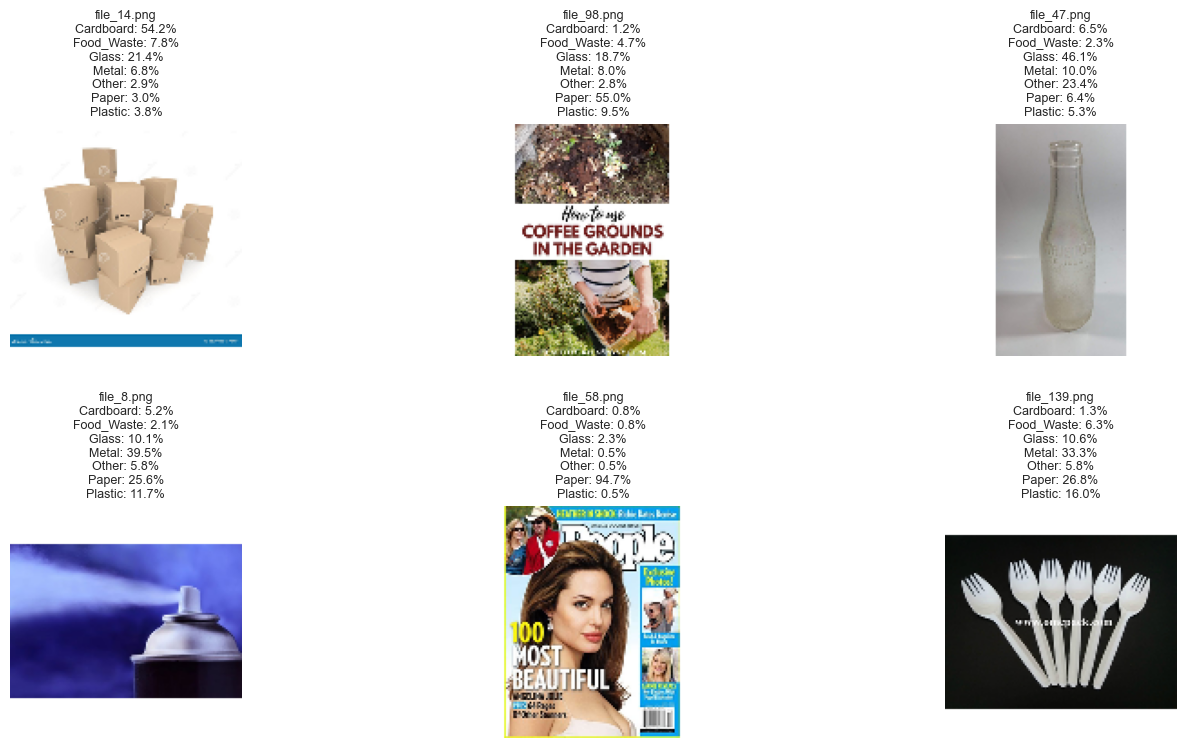

In [92]:
from tensorflow.keras.preprocessing import image

image_paths = [
    'waste_dataset/data/Cardboard/file_14.png',
    'waste_dataset/data/Food_Waste/file_98.png',
    'waste_dataset/data/Glass/file_47.png',
    'waste_dataset/data/Metal/file_8.png',
    'waste_dataset/data/Paper/file_58.png',
    'waste_dataset/data/Plastic/file_139.png',
]

class_names = label_encoder.classes_

img_arrays = []
for img_path in image_paths:
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    img_arrays.append(img_array)

batch_array = np.stack(img_arrays, axis=0)

predictions = model.predict(batch_array)

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

for idx, (ax, img_path, pred) in enumerate(zip(axs.flat, image_paths, predictions)):
    img = image.load_img(img_path, target_size=target_size)
    
    ax.imshow(img)
    ax.axis('off')
    
    pred_text = "\n".join(
        [f"{class_names[i]}: {prob * 100:.1f}%" for i, prob in enumerate(pred)]
    )
    
    ax.set_title(f"{img_path.split('/')[-1]}\n{pred_text}", fontsize=9)

plt.tight_layout()
plt.show()
